In [28]:
pip install xgboost

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [30]:
CreditTrain=pd.read_csv("CreditScore_train.csv.zip")
CreditTest=pd.read_csv("CreditScore_test.csv.zip")
Credit_df = pd.concat((CreditTrain,CreditTest),axis=0)
Credit_df

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,x041,x042,x043,x044,x045,x046,x047,x048,x049,x050,...,x256,x257,x258,x259,x260,x261,x262,x263,x264,x265,x266,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y
0,1084094,426.00,39.00,128.00,426.00,0,0,0,0,0,2,4,4,9,19,5,14,8,5,6,2,3,2,1,1,1,1,6,1,5,0,0,0,0,0,0,0,0,0,0,0.70,197600,60073,140000.00,200.00,2,0,0,0,0,...,53.00,57.00,483322,0.88,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,0,0.19,484289,0,NaN,0,0,0,484289,0,484289,1,1,1,0,0,1.00,NaN,NaN,NaN,0,346762,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,807
1,1287777,160.00,2.00,64.00,160.00,1,1,2,0,1,3,3,7,5,21,5,16,5,3,9,2,3,1,9,1,1,1,3,9,6,0,0,0,0,0,0,0,0,0,0,0.03,25000,24327,18000.00,600.00,2,0,0,0,0,...,49.00,49.00,107316,0.92,1,1,1,1,17318,9.00,2.00,5.50,0.84,1,1,1,0.24,125307,0,NaN,0,0,0,125307,0,125307,1,1,1,2,0,1.00,9.00,2.00,5.50,17318,124634,0.84,0,NaN,17318,0.84,1,1,1,0,NaN,0,NaN,819
2,1483016,163.00,16.00,104.00,239.00,0,0,0,1,0,1,0,0,6,8,3,5,4,2,7,3,3,2,0,0,0,1,0,0,4,1,0,0,0,1,1,0,0,0,1,0.05,15400,14694,9000.00,500.00,1,1,0,0,0,...,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.03,706,0,NaN,0,0,0,706,0,706,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,803
3,959054,NaN,NaN,NaN,102.00,0,0,0,0,0,0,2,2,0,4,0,4,2,0,0,0,0,0,3,0,0,0,0,0,0,7,0,0,1,4,6,0,0,1,3,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.30,619,619,0.81,0,0,0,0,0,0,1,1,1,0,0,9.00,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,1,1,1,0,NaN,0,NaN,530
4,1342113,3.00,2.00,2.00,62.00,0,2,2,0,0,1,2,0,0,5,2,3,2,2,2,1,1,1,3,0,1,1,0,3,2,3,0,1,1,1,3,0,1,1,1,1.42,300,-126,300.00,300.00,0,0,0,0,0,...,NaN,NaN,0,NaN,0,0,0,1,17413,2.00,2.00,2.00,1.02,1,1,1,0.84,38837,21424,0.74,1,1,1,17839,426,17413,1,1,1,1,0,9.00,2.00,2.00,2.00,17413,17413,1.02,0,NaN,17413,1.02,1,1,1,0,NaN,0,NaN,485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1341378,51.00,3.00,18.00,120.00,0,1,3,0,1,2,1,0,3,10,4,6,5,4,2,1,1,1,7,0,1,1,0,4,2,10,1,1,3,7,9,1,1,3,6,0.99,600,3,600.00,300.00,0,0,0,0,0,...,NaN,NaN,0,NaN,0,0,0,1,32552,51.00,3.00,27.00,0.78,1,1,1,0.48,41146,6170,0.95,0,0,0,34976,11247,23729,1,1,1,3,0,9.00,51.00,3.00,20.67,34379,34379,0.78,11247,0.61,23132,0.91,1,1,1,0,NaN,0,NaN,541
19996,1290822,187.00,13.00,107.00,415.00,0,0,1,1,0,1,0,0,8,11,4,7,7,4,6,2,3,2,2,1,1,1,1,2,4,2,0,0,0,0,2,0,0,0,0,0.00,170500,170161,149000.00,500.00,1,1,0,0,0,...,115.00,115.00,0,0.00,1,1,1,1,19269,13.00,13.00,13.00,0.83,1,1,1,0.04,19608,0,NaN,0,0,0,19608,0,19608,1,1,1,1,0,1.00,13.00,13.00,13.00,19269,19269,0.83,0,NaN,19269,0.83,1,1,1,0,NaN,0,NaN,831
19997,795243,95.00,19.00,57.00,95.00,1,0,2,2,2,2,7,2,0,17,11,6,4,2,1,0,1,0,15,0,1,1,0,2,1,12,0,3,4,6,11,0,2,3,5,NaN,0,0,300.00,300.00,0,0,0,0,0,...,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,1,1,1,0.39,38465,7695,0.56,0,0,0,30770,30770,0,1,1,1,10,0,9.00,95.00,34.00,61.70,30770,30770,1.23,30770,1.23,0,NaN,1,1,1,0,5.00,30770,1.23,543
19998,1323781,NaN,NaN,NaN,40.00,0,0,0,0,5,2,0,0,0,7,0,7,1,0,0,0,0,0,7,0,0,0,0,0,0,4,0,1,2,2,3,0,1,2,2,NaN,0,0,NaN,NaN,0,0,0,0,0,...,NaN,NaN,0,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,0,0,0.17,1070,1070,0.51,0,0,0,0,0,0,1,1,1,0,0,9.00,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,1,1,1,0,NaN,0,NaN,488


In [31]:
print(Credit_df.shape)
Credit_null = Credit_df.isnull().sum() / len(Credit_df) * 100 
Credit_null_df = pd.DataFrame({"columns":Credit_df.columns,"Percentage": Credit_null})
Credit_null_df = Credit_null_df[(Credit_null_df['Percentage'] > 0) & (Credit_null_df['Percentage'] <=10)]
Credit_null_df

(100000, 305)


,columns,Percentage
x005,x005,6.11
x272,x272,7.19


,x005,x272
count,93890.00,92811.00
mean,178.24,0.59
std,124.52,5.39
min,0.00,0.00
25%,87.00,0.08
50%,150.00,0.29
75%,246.00,0.57
max,827.00,608.10


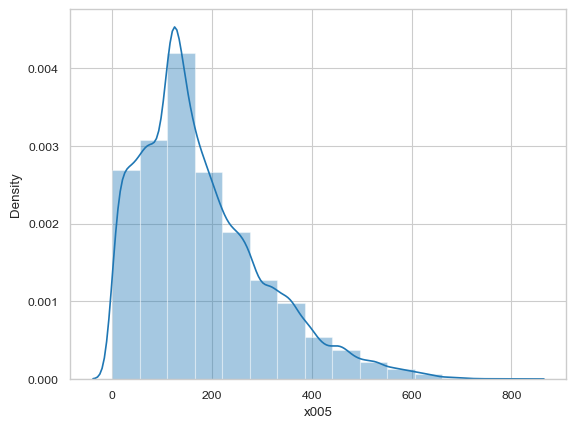

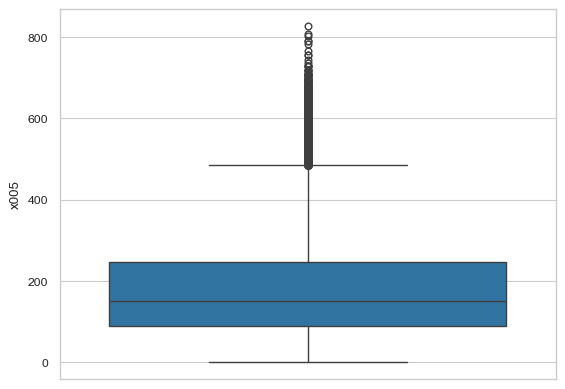

25th Quartile: 88.0
75th Quartile: 247.0
IQR: 159.0
Upper Outlier: 485.5
Lower Outlier: -150.5


,x005,x272
count,90386.00,90386.00
mean,169.09,0.60
std,109.79,5.46
min,0.00,0.00
25%,86.00,0.08
50%,147.00,0.29
75%,237.00,0.58
max,485.00,608.10


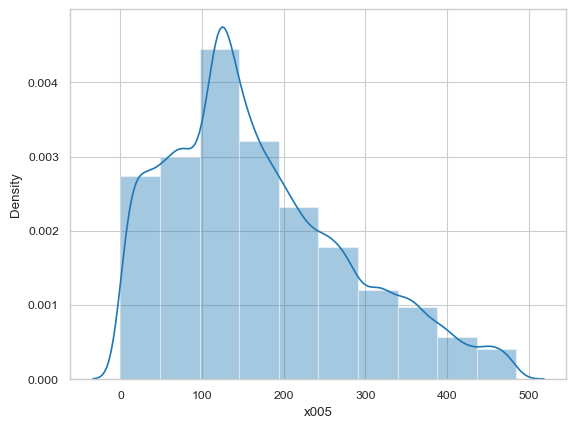

x005       0
x272    7189
dtype: int64

,x005,x272
count,100000.00,92811.00
mean,178.24,0.59
std,120.66,5.39
min,0.00,0.00
25%,94.00,0.08
50%,159.00,0.29
75%,237.00,0.57
max,827.00,608.10


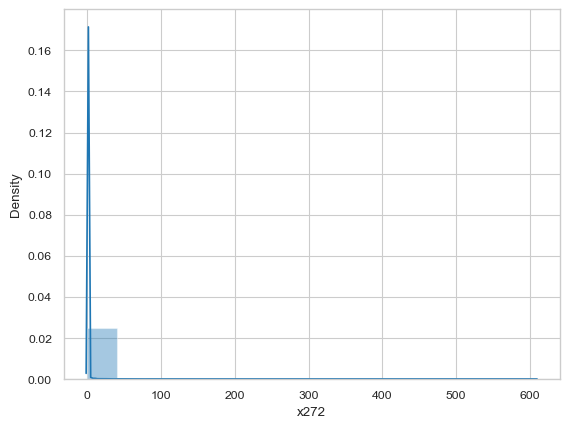

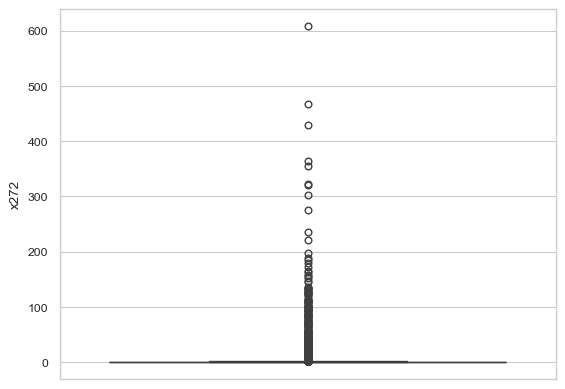

25th Quartile: 0.0814
75th Quartile: 0.5813
IQR: 0.4999
Upper Outlier: 1.33115
Lower Outlier: -0.66845


,x005,x272
count,88423.00,88423.00
mean,170.71,0.36
std,109.81,0.32
min,0.00,0.00
25%,88.00,0.08
50%,149.00,0.28
75%,239.00,0.55
max,485.00,1.33


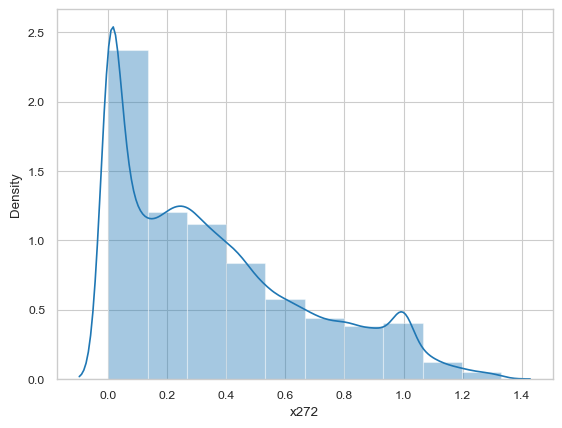

x005    0
x272    0
dtype: int64

,x005,x272
count,100000.00,100000.00
mean,178.24,0.59
std,120.66,5.19
min,0.00,0.00
25%,94.00,0.09
50%,159.00,0.32
75%,237.00,0.59
max,827.00,608.10


In [32]:
Credit_pre = Credit_df[['x005','x272']]
display(Credit_pre.describe())
Credit_pre1 = Credit_pre.copy()
for col in Credit_pre1.columns:
    Credit_pre1.dropna(inplace=True)
    ax = sns.distplot(Credit_pre1[col],bins=15)
    plt.show(ax)
    ax1 = sns.boxplot(Credit_pre1[col])
    plt.show(ax1)
    q25,q75 = np.percentile(Credit_pre1[col],25),np.percentile(Credit_pre1[col],75)
    IQR = q75 - q25
    print("25th Quartile:",q25)
    print("75th Quartile:",q75)
    print("IQR:",IQR)
    upper, lower = (q75 + (1.5 *IQR)), (q25 - (1.5 * IQR))
    print("Upper Outlier:",upper)
    print("Lower Outlier:", lower)
    Credit_pre1 = Credit_pre1[(Credit_pre1[col] > lower) & (Credit_pre1[col] < upper)]
    display(Credit_pre1.describe())
    ax = sns.distplot(Credit_pre1[col],bins=10)
    plt.show(ax)
    Credit_pre[col].fillna(Credit_pre[col].mean(), inplace=True)
    display(Credit_pre.isnull().sum())
    display(Credit_pre.describe())